In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [6]:
breweries_df = pd.DataFrame()
raw_data = []

# Base API URL
brew_base_url = "https://api.openbrewerydb.org/v1/breweries?"


# Number of pages and brews per page to go through from the brewery api
meta_data = requests.get('https://api.openbrewerydb.org/v1/breweries/meta?by_country=United_States')
meta_data = meta_data.json()
breweries_per = 200
num_pages = int(meta_data['total']) / breweries_per
num_pages = round(num_pages)
num_pages

40

In [7]:
beer_info_df = pd.DataFrame({'id':[],'name':[],'brewery_type':[],'address_1':[],'address_2':[],'address_3':[],
                             'city':[],'state_province':[],'postal_code':[],'country':[],'longitude':[],'latitude':[],
                             'phone':[],'website_url':[],'state':[],'street':[]})
try:
    num_pages
    #page_count = page_count + 1
    for i in range(num_pages + 1):
        #skip the page 0
        if (i == 0):
            continue
        time.sleep(1)
        path = f"https://api.openbrewerydb.org/v1/breweries?per_page={str(breweries_per)}&page={str(i)}&by_country=United_States"
        # print(req)
        print(f"Processing page {i} of {num_pages}")
        beer_info = requests.get(path).json()
        beer_info = pd.DataFrame(beer_info)
        beer_info_df = pd.concat([beer_info_df, beer_info], ignore_index=True)
except:
    print(f'Stopped at {i} pages')
beer_info_df

Processing page 1 of 40
Processing page 2 of 40
Processing page 3 of 40
Processing page 4 of 40
Processing page 5 of 40
Processing page 6 of 40
Processing page 7 of 40
Processing page 8 of 40
Processing page 9 of 40
Processing page 10 of 40
Processing page 11 of 40
Processing page 12 of 40
Processing page 13 of 40
Processing page 14 of 40
Processing page 15 of 40
Processing page 16 of 40
Processing page 17 of 40
Processing page 18 of 40
Processing page 19 of 40
Processing page 20 of 40
Processing page 21 of 40
Processing page 22 of 40
Processing page 23 of 40
Processing page 24 of 40
Processing page 25 of 40
Processing page 26 of 40
Processing page 27 of 40
Processing page 28 of 40
Processing page 29 of 40
Processing page 30 of 40
Processing page 31 of 40
Processing page 32 of 40
Processing page 33 of 40
Processing page 34 of 40
Processing page 35 of 40
Processing page 36 of 40
Processing page 37 of 40
Processing page 38 of 40
Processing page 39 of 40
Processing page 40 of 40


,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,None,None,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7974,720a84ad-c18f-4181-8d21-35eb6b80bec0,ZwanzigZ Brewing,brewpub,1038 Lafayette Ave,None,None,Columbus,Indiana,47201-5756,United States,-85.91883647,39.20865674,8123760200,http://www.zwanzigz.com,Indiana,1038 Lafayette Ave
7975,a602e9ea-f0b3-4a40-8aa8-02e0aace191c,Zwei Brewing Co,micro,4612 S Mason St Ste 120,None,None,Fort Collins,Colorado,80525-3794,United States,None,None,9702232482,http://www.zweibruderbrewing.com,Colorado,4612 S Mason St Ste 120
7976,8d18da7a-1ed9-4eb4-b87c-ac444aa81e14,Zydeco Brew Werks,brewpub,1902 E 7th Ave,None,None,Tampa,Florida,33605-3810,United States,-82.43783229,27.9603438,8132524541,None,Florida,1902 E 7th Ave
7977,82234375-c7fa-4208-8878-b661b7a1e6aa,Zymurcracy Beer Company,micro,4624 Creek Dr Ste 6,None,None,Rapid City,South Dakota,57701-2165,United States,-103.1795198,44.03811547,6057910411,http://www.zymurcracybeer.com,South Dakota,4624 Creek Dr Ste 6


In [8]:
#Get Population Data
population_data = pd.read_csv("Population Data/Cencus.csv")

In [9]:
# Clean beer info data
beer_info_df.loc[:, "state_province"] = beer_info_df.loc[:, "state_province"].str.strip()
beer_info_df.loc[:, "state_province"] = beer_info_df.loc[:, "state_province"].str.title()

# Get count of brewies per state
brewies_state_count = beer_info_df.groupby("state_province")["name"].count()
brewies_state_count

state_province
Alabama                  45
Alaska                   51
Arizona                 124
Arkansas                 45
California              912
Colorado                431
Connecticut              94
Delaware                 28
District Of Columbia     16
Florida                 312
Georgia                 100
Hawaii                   23
Idaho                    67
Illinois                254
Indiana                 162
Iowa                     91
Kansas                   47
Kentucky                 58
Louisiana                43
Maine                   114
Maryland                109
Massachusetts           163
Michigan                375
Minnesota               182
Mississippi              17
Missouri                142
Montana                  92
Nebraska                 57
Nevada                   51
New Hampshire            80
New Jersey              115
New Mexico               83
New York                418
North Carolina          307
North Dakota             26
Ohio 

In [50]:
#Create Data Frame for correlation
correlation_df = population_data.loc[:, ['State', '2023']]
correlation_df['Brewies Count'] = brewies_state_count.values
correlation_df.columns = ['State', '2023 Population Estimate', 'Brewies Count']
correlation_df

,State,2023 Population Estimate,Brewies Count
0,Alabama,5108468,45
1,Alaska,733406,51
2,Arizona,7431344,124
3,Arkansas,3067732,45
4,California,38965193,912
5,Colorado,5877610,431
6,Connecticut,3617176,94
7,Delaware,1031890,28
8,District Of Columbia,678972,16
9,Florida,22610726,312


In [36]:
def plot_linear_regression(x_val, y_val, x_str, y_str, fig_name):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regress_values, "r-")
    plt.annotate(line_eq,(x_val.min() + .5, y_val.max() - 10), fontsize=15, color="red")
    plt.xlabel(x_str)
    plt.ylabel(y_str)
    plt.ticklabel_format(style='plain')
    plt.xticks(rotation='vertical')
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"{fig_name}.png")
    plt.show()
    

The r-squared is: 0.6794119775793709


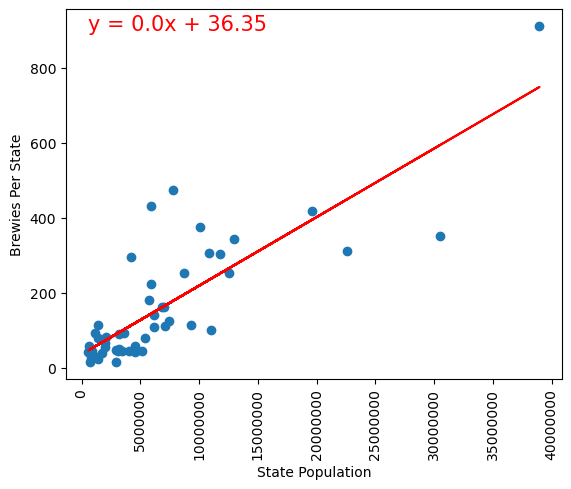

In [37]:
plot_linear_regression(x_val = correlation_df['2023 Population Estimate'], 
                       y_val = correlation_df['Brewies Count'], 
                       x_str = 'State Population', 
                       y_str = 'Brewies Per State',
                       fig_name = 'Brew_State_Cor_With_Out')

In [41]:
# Remove Population Outlires
#quartiles = correlation_df['2023 Population Estimate'].quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)

#outliers = correlation_df.loc[(correlation_df['2023 Population Estimate'] < lower_bound) | (correlation_df['2023 Population Estimate'] > upper_bound)]
#print(outliers)
#correlation_without_outliers_df = correlation_df.drop(outliers.index)

# Remove Brewies Count Outlires
quartiles = correlation_df['Brewies Count'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers = correlation_df.loc[(correlation_df['Brewies Count'] < lower_bound) | (correlation_df['Brewies Count'] > upper_bound)]
print(outliers)
correlation_without_outliers_df = correlation_df.drop(outliers.index)

        State  2023 Population Estimate  Brewies Count
4  California                  38965193            912


The r-squared is: 0.498394700549835


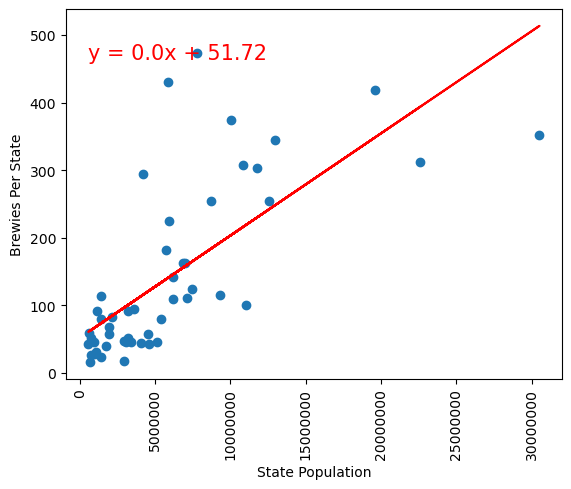

In [42]:
plot_linear_regression(x_val = correlation_without_outliers_df['2023 Population Estimate'], 
                       y_val = correlation_without_outliers_df['Brewies Count'], 
                       x_str = 'State Population', 
                       y_str = 'Brewies Per State',
                       fig_name = 'Brew_State_Cor_No_Out')

In [48]:
smallest_df = correlation_df.nsmallest(20, '2023 Population Estimate')
smallest_df

,State,2023 Population Estimate,Brewies Count
50,Wyoming,584057,43
45,Vermont,647464,59
8,District Of Columbia,678972,16
1,Alaska,733406,51
34,North Dakota,783926,26
41,South Dakota,919318,45
7,Delaware,1031890,28
39,Rhode Island,1095962,31
26,Montana,1132812,92
19,Maine,1395722,114


The r-squared is: 0.0005560451219856324


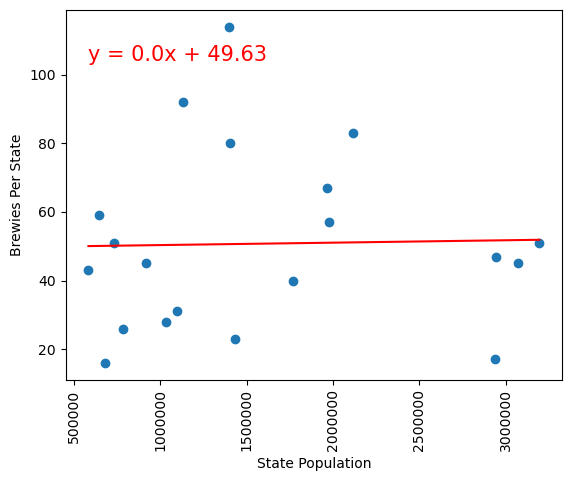

In [49]:
plot_linear_regression(x_val = smallest_df['2023 Population Estimate'], 
                       y_val = smallest_df['Brewies Count'], 
                       x_str = 'State Population', 
                       y_str = 'Brewies Per State',
                       fig_name = 'Small States Correlation')